<a href="https://colab.research.google.com/github/bill7845/WorkFromHome/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from matplotlib import pyplot
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
def load_data():
  df = pd.read_csv("/content/drive/MyDrive/Colab code/dacon_부동산 시각화/data/아파트 실거래가격지수.csv")
  for col in df.columns[1:]:
    df.rename(columns={col : col.split('[')[0]}, inplace=True)
  df.rename(columns={"Unnamed: 0" : "Date"}, inplace=True)

  df = df.set_index("Date").loc['2017-11-01':].reset_index()

  return df

def m_prophet(target,period):
  
  df = load_data()
  print(df.columns[1:])
  df = df[["Date",target]]
  
  df.columns = ['ds','y']

  m = Prophet(yearly_seasonality=10, weekly_seasonality=False, changepoints=['2020-05-01', '2020-07-01'], daily_seasonality=False)
  m.fit(df)

  future = m.make_future_dataframe(periods=period, freq="MS")
  
  forecast = m.predict(future)
  
  fig = m.plot(forecast)
  a = add_changepoints_to_plot(fig.gca(), m, forecast)

  return m,forecast

def get_plotly(target, period):
  df = load_data()

  # target
  target = target
  period = period
  df = df[['Date',target]]
  df.columns = ['ds','y'] # prep prophet 

  # model
  m = Prophet(yearly_seasonality=10, weekly_seasonality=False, changepoints=['2020-05-01', '2020-07-01'], daily_seasonality=False)
  m.fit(df)

  future = m.make_future_dataframe(periods=period, freq="MS") # prep forecasting
  forecast = m.predict(future) # predict

  ## go plotly
  trace = go.Scatter(
      name = 'Actual price',
      mode = 'markers',
      x = list(forecast['ds']),
      y = list(df['y']),
      marker=dict(
          color='black',
          line=dict(width=1)
      )
  )

  trace1 = go.Scatter(
      name = 'predict',
      mode = 'lines',
      x = list(forecast['ds']),
      y = list(forecast['yhat']),
      marker=dict(
          color='red',
          line=dict(width=3)
      )
  )

  upper_band = go.Scatter(
      name = 'upper band',
      mode = 'lines',
      x = list(forecast['ds']),
      y = list(forecast['yhat_upper']),
      line= dict(color='#57b88f'),
      fill = 'tonexty'
  )

  lower_band = go.Scatter(
      name= 'lower band',
      mode = 'lines',
      x = list(forecast['ds']),
      y = list(forecast['yhat_lower']),
      line= dict(color='#1705ff')
  )

  data = [trace1, lower_band, upper_band, trace]

  layout = dict(title=f'{target} 아파트 실거래가격지수 추이',
              xaxis=dict(title = 'Dates', ticklen=2, zeroline=True), hovermode='x')

  figure=dict(data=data,layout=layout)

  py.offline.iplot(figure)

Index(['도심권', '동북권', '동남권', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기',
       '강원', '충북', '충남', '서북권', '서남권', '전북', '전남', '경북', '경남', '제주', '광역시',
       '지방광역시', '지방도', '전국', '서울', '수도권', '지방'],
      dtype='object')


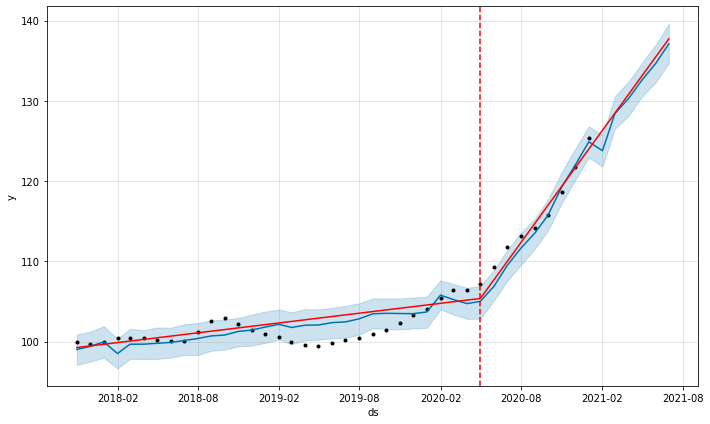

In [50]:
m,forecast = m_prophet("전국", 6)
plot_plotly(m,forecast)

In [48]:
target_list = ['도심권', '동북권', '동남권', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
       '경기', '강원', '충북', '충남', '서북권', '서남권', '전북', '전남', '경북', '경남', '제주',
       '광역시', '지방광역시', '지방도', '전국', '서울', '수도권', '지방']
for target in target_list:
  if target == '광역시' : pass
  else :
    get_plotly(target, 6)